# Linear Classification w/ Perceptron Algorithm

In this notebook, we will be using the Perceptron Algorithm for a binary linear classification task. We will use a function to generate our own data (to ensure linear separability so that our algorithm converges) and then apply our Perceptron algorithm to compare the learned decision boundary to the original.

## Step 1: Import Libraries & Define Constants

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Classifiers.Perceptron import Perceptron

In [2]:
# Constants
DIM = 2      # Dimension of dataset
SIZE = 50   # Number of points in dataset

# Needed for choosing random data points
LOWER_BOUND = -10
UPPER_BOUND = 10

## Step 2: Generate Dataset

To generate our dataset, we will start by using `numpy.random.rand` to create an arbitrary normal vector $\theta$ and offset value that describes our desired decision boundary $\theta \cdot \vec{x} + b = 0$. We will then randomly choose data points to form the dataset and label them using our decision boundary. 

In [3]:
# Generate a theta and offset
theta = np.random.rand(DIM)
offset = np.random.randint(LOWER_BOUND, UPPER_BOUND)

# Generate dataset
dataset = np.random.rand(SIZE, DIM) * (UPPER_BOUND - LOWER_BOUND) + LOWER_BOUND

# Label data points accordingly
labels = np.dot(dataset, theta) + offset
labels[labels > 0] = 1
labels[labels <= 0] = -1

## Step 3: Run Perceptron Algorithm on Dataset

Now that we have our dataset, we can initialize our Perceptron algorithm and train it on this dataset.

In [4]:
classifier = Perceptron(dimension=DIM, verbose=True)
theta_pred, offset_pred = classifier.train(dataset, labels)

Dimensionality: 2
Number of Datapoints: 50

Number of Updates: 113
Final Decision Boundary: [-0.71166467 20.5408827 ]
Final Offset Value: 37.0


## Step 4: Visualize Decision Boundary

Finally, we want to visualize our decision boundary and determine whether it really worked. To do this, we can use `plt.plot` from the `matplotlib` library to plot the individual data points from our dataset (color coded by positive or negative label). Then, we can superimpose the decision boundary learned by our algorithm to determine whether it effectively classified the data. 

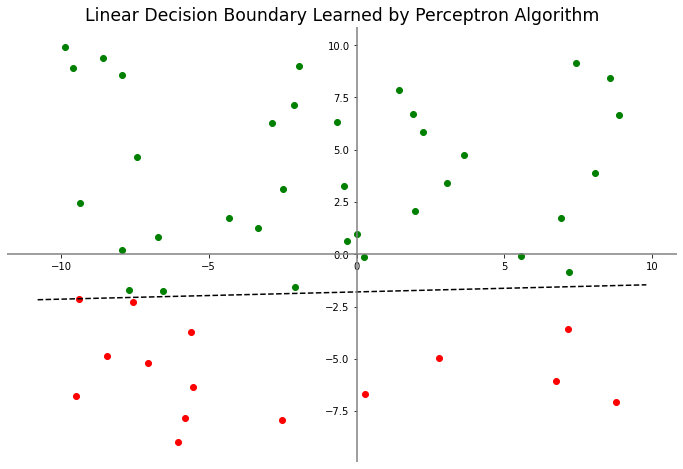

In [6]:
def abline(slope, intercept, color):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color=color)

# Determine positive & negative datasets
pos = dataset[labels == 1]
neg = dataset[labels == -1]

# Plot scatter plot of these datasets
plt.figure(figsize=(12, 8))
plt.title('Linear Decision Boundary Learned by Perceptron Algorithm', fontsize='xx-large')
plt.plot(pos[:, 0], pos[:, 1], 'o', color='green')
plt.plot(neg[:, 0], neg[:, 1], 'o', color='red')

# Plot Perceptron decision boundary
abline(-1 * theta_pred[0] / theta_pred[1], -1 * offset_pred / theta_pred[1], 'black')

# Styling
ax = plt.gca()

# Show coordinate axes
ax.axhline(y=0, color='gray')
ax.axvline(x=0, color='gray')

ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['right'].set_color('none')

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
